# Clustering

In this notebook we showcase examples of applying CURE, DBSCAN, hierarchical and k-means clustering methods to a variety of datasets in kdb+/q.

### Dependencies

To run the below notebook, the following dependencies are required.
```
- embedPy
- matplotlib
- pyclustering
```

### Load libraries and scripts

In the below cell, the clustering section of the ML-Toolkit is loaded in, along with the possible distance/linkage metrics and `graphics.q`, a script which the contains functions required to plot each algorithm.

In [1]:
\l ml/ml.q
.ml.loadfile`:clust/init.q
\l graphics.q
show df:key .ml.clust.i.dd    / distance metrics
show lf:key .ml.clust.i.ld    / linkage metrics

`e2dist`edist`mdist`cshev
`single`complete`average`centroid`ward


Throughout the notebook, we visualize data using the python `matplotlib` library as well as datasets from the python `pyclustering` samples library. All of the necessary functions provided in each can be imported using embedPy as shown below.

In [1]:
plt:.p.import`matplotlib.pyplot
.p.import[`mpl_toolkits.mplot3d]`:Axes3D;
fcps:.p.import[`pyclustering.samples.definitions]`:FCPS_SAMPLES
smpl:.p.import[`pyclustering.samples.definitions]`:SIMPLE_SAMPLES
read:.p.import[`pyclustering.utils]`:read_sample

---
## Examples

### Dataset 1

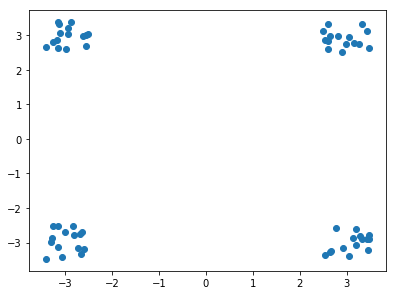

In [3]:
d1:read[smpl`:SAMPLE_SIMPLE5]`
plt[`:scatter][;]. flip d1;
plt[`:show][];

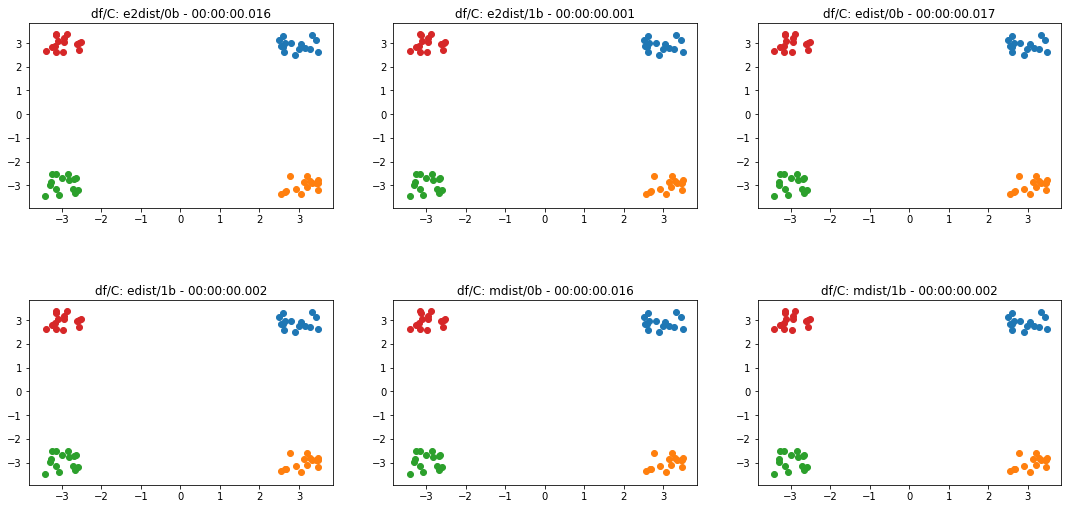

In [4]:
plotcluster[`cure;d1;(4;5),/:enlist each{![`df`b;x]}each(cross/)(-1_df;01b)]

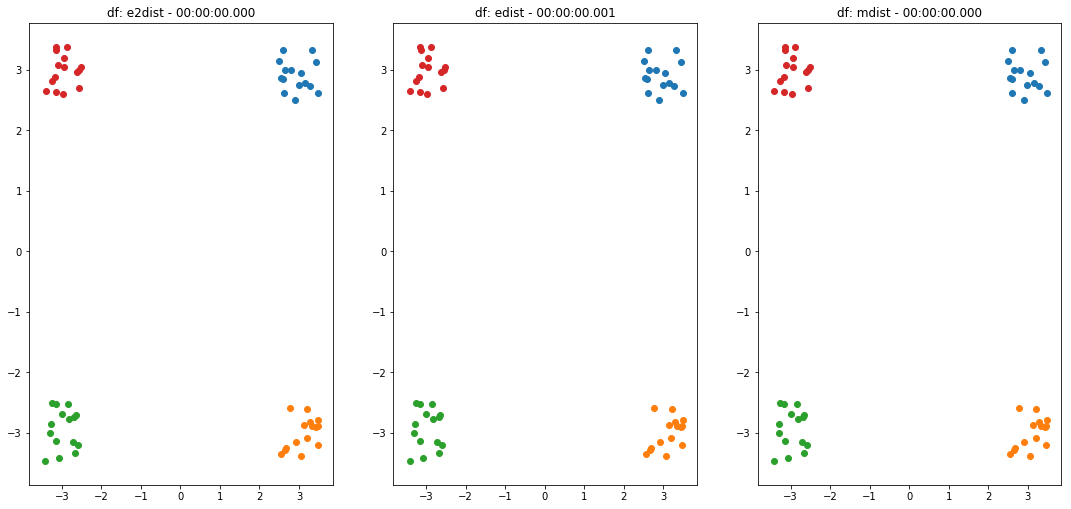

In [5]:
plotcluster[`dbscan;d1;(cross/)(-1_df;5;5)]

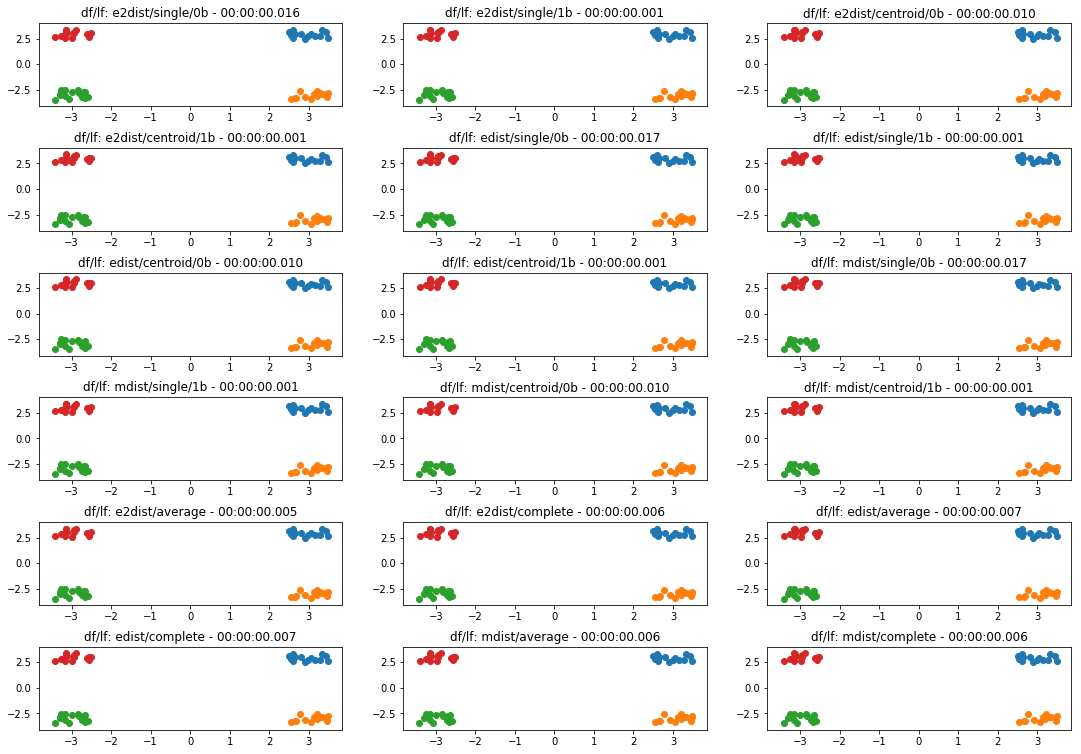

In [6]:
plotcluster[`hc;d1;((cross/)(4;-1_df;`single`centroid;01b)),(cross/)(4;-1_df;`average`complete;(::))]

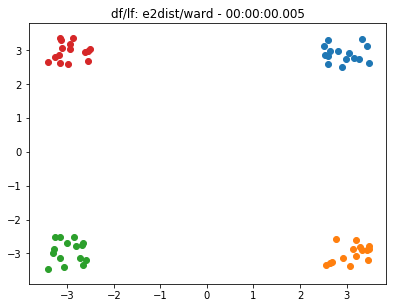

In [7]:
plotcluster[`ward;d1;(4;`e2dist;`ward;0b)]

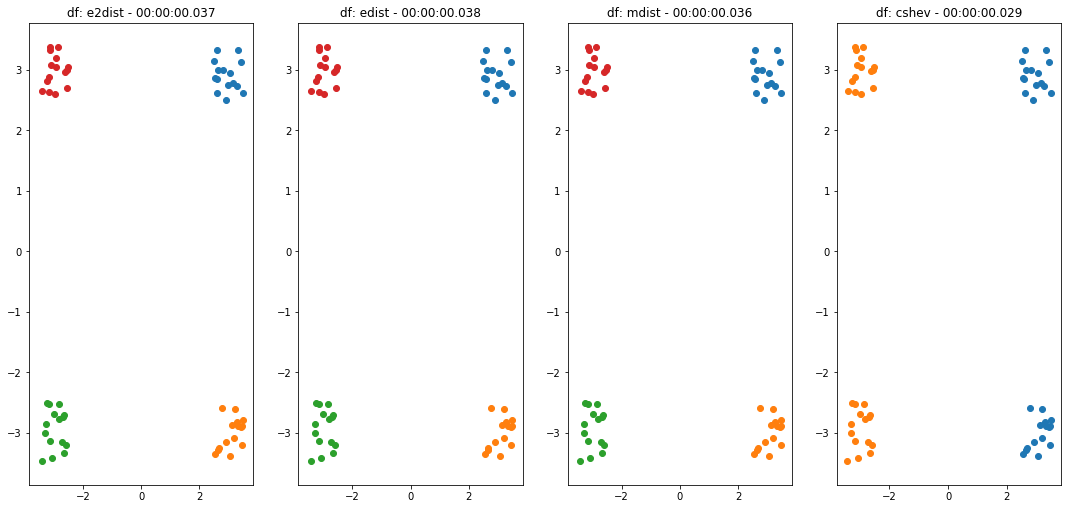

In [8]:
plotcluster[`kmeans;d1;(cross/)(4;1000;1b;df)]

### Dataset 2

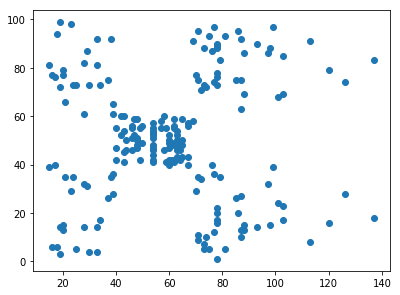

In [9]:
/ The below dataset can be found on kaggle:
/ https://www.kaggle.com/shwetabh123/mall-customers/downloads/mall-customers.zip/1
d2:distinct flip@[;`AnnualIncome`SpendingScore]("SSFFF";(),",")0:`:data/Mall_Customers.csv
plt[`:scatter][;]. flip d2;
plt[`:show][];

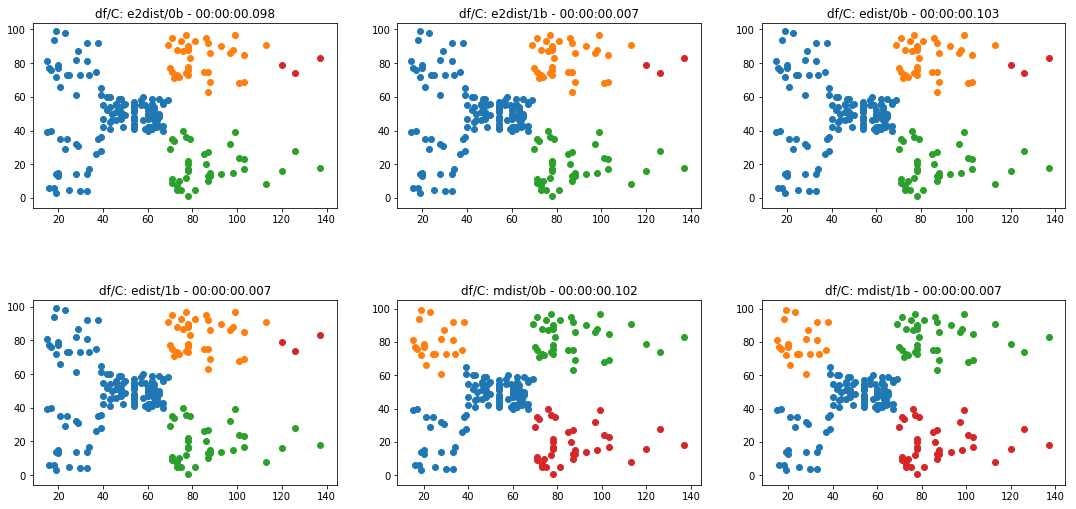

In [10]:
plotcluster[`cure;d2;(4;5),/:enlist each{![`df`c`b;x]}each(cross/)(-1_df;1;01b)]

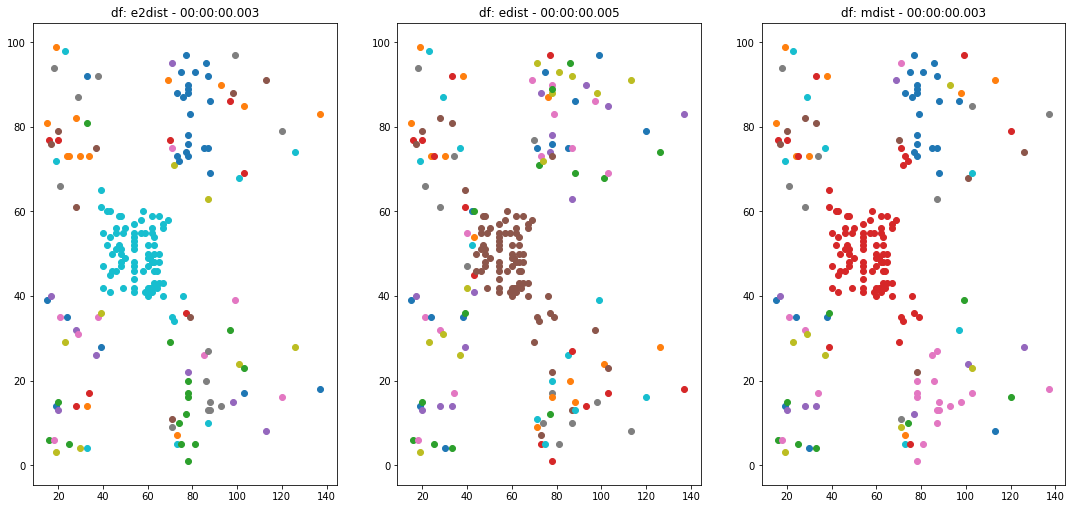

In [11]:
plotcluster[`dbscan;d2;(-1_df),'(10 100;40 15;20 19)]

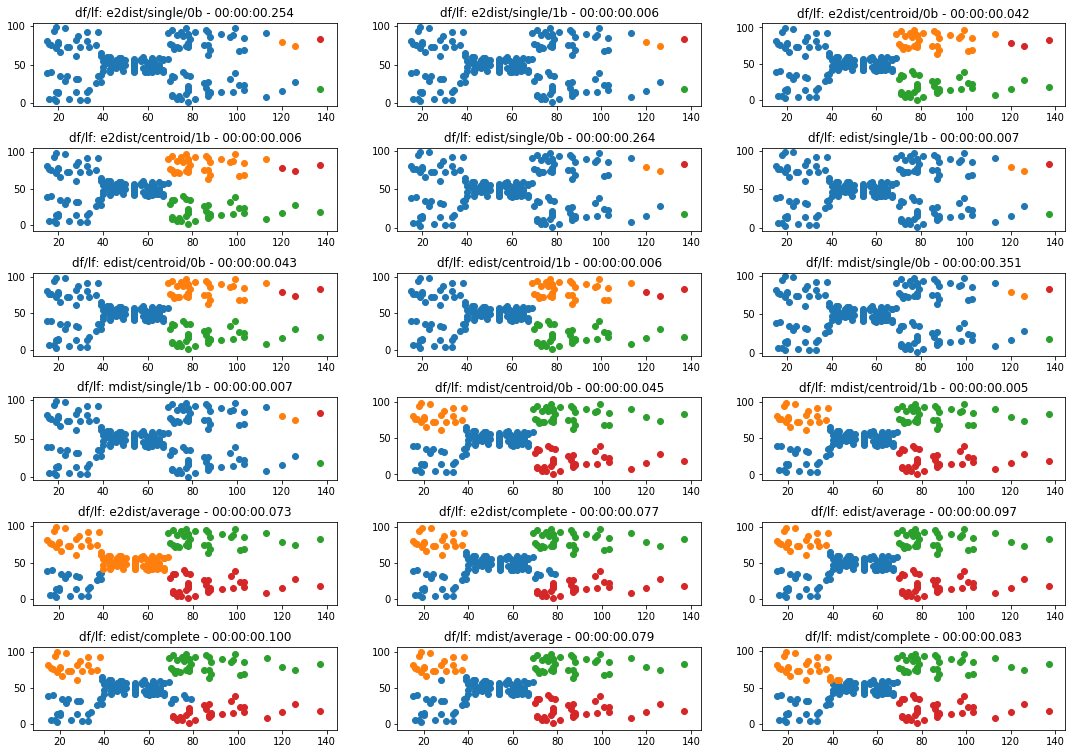

In [12]:
plotcluster[`hc;d2;((cross/)(4;-1_df;`single`centroid;01b)),(cross/)(4;-1_df;`average`complete;0b)]

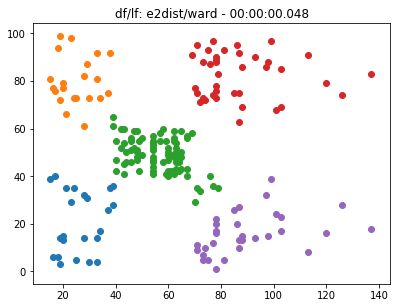

In [13]:
plotcluster[`ward;d2;(5;`e2dist;`ward;0b)]

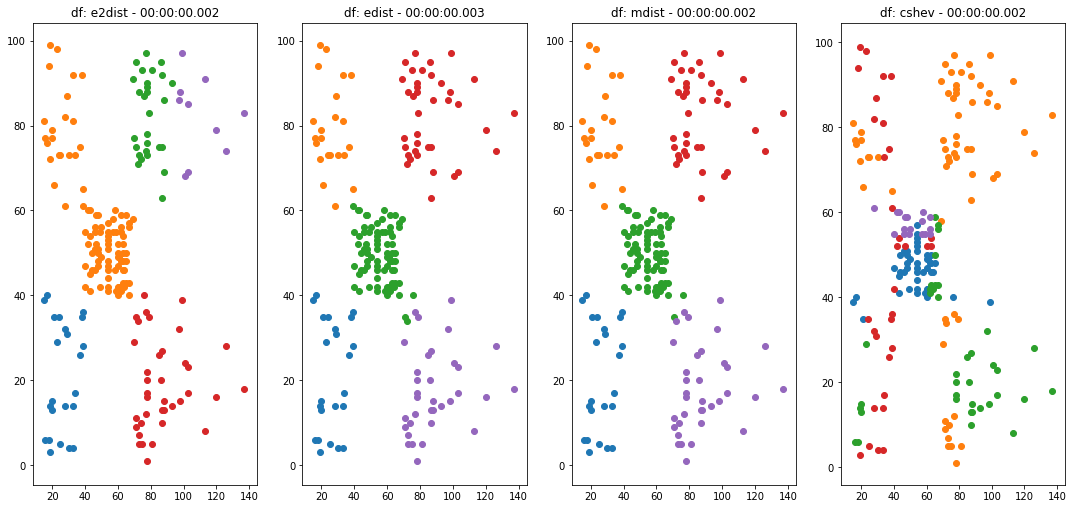

In [14]:
plotcluster[`kmeans;d2;(cross/)(5;20;1b;df)]

### Dataset 3

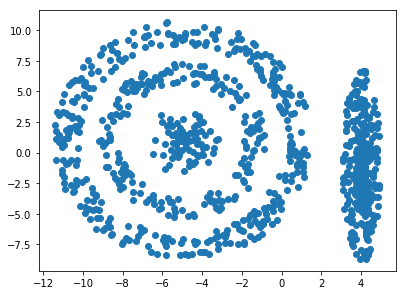

In [15]:
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
d3 :flip(-5 1)+(1 1.5)*dsc[1000;0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
d3,:flip(4 -1)+(1 8)*dsc[4000;0;1.]
d3@:neg[1000&count d3]?count d3
plt[`:scatter][;]. flip d3;
plt[`:show][];

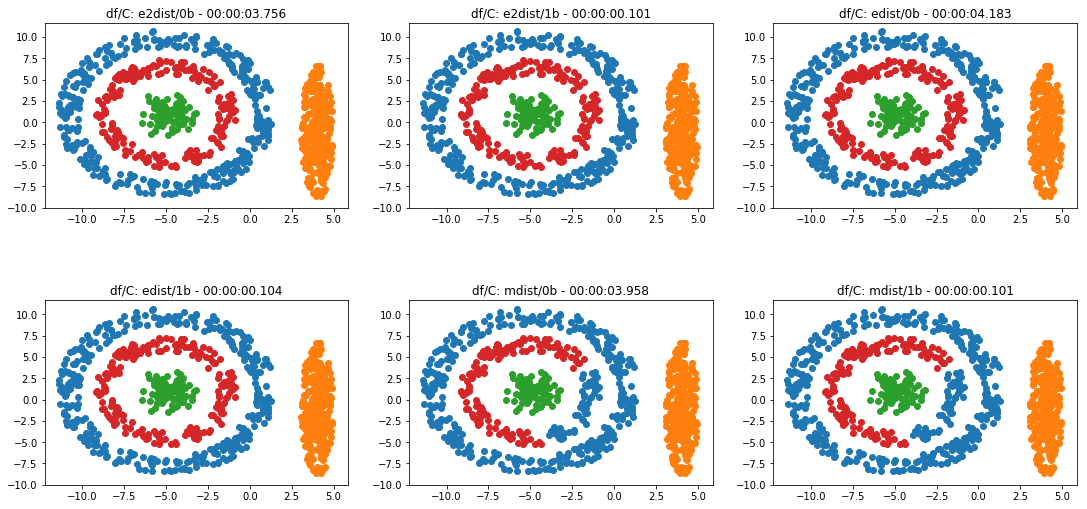

In [16]:
plotcluster[`cure;d3;(4;30),/:enlist each{![`df`b;x]}each(cross/)(-1_df;01b)]

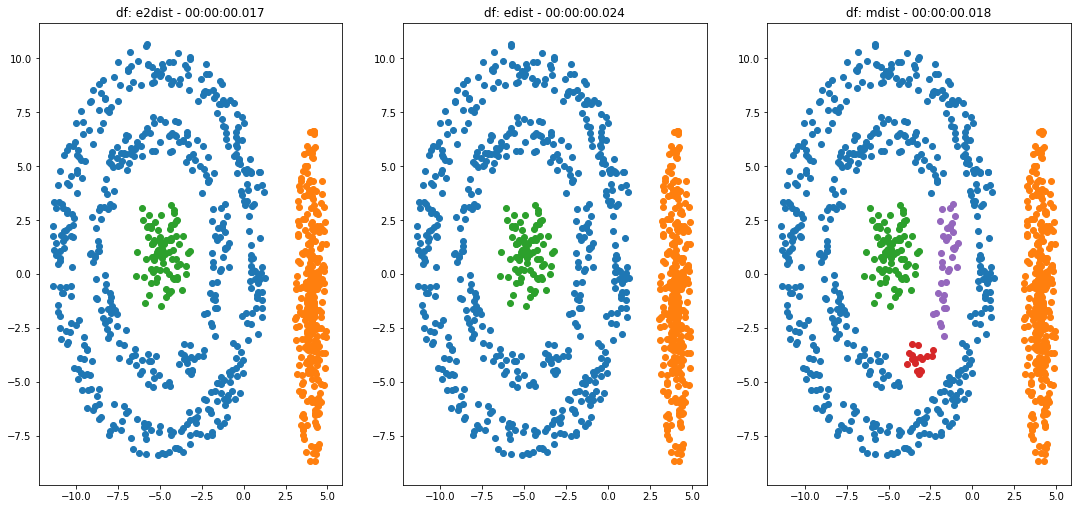

In [17]:
plotcluster[`dbscan;d3;(cross/)(-1_df;2;1.2)]

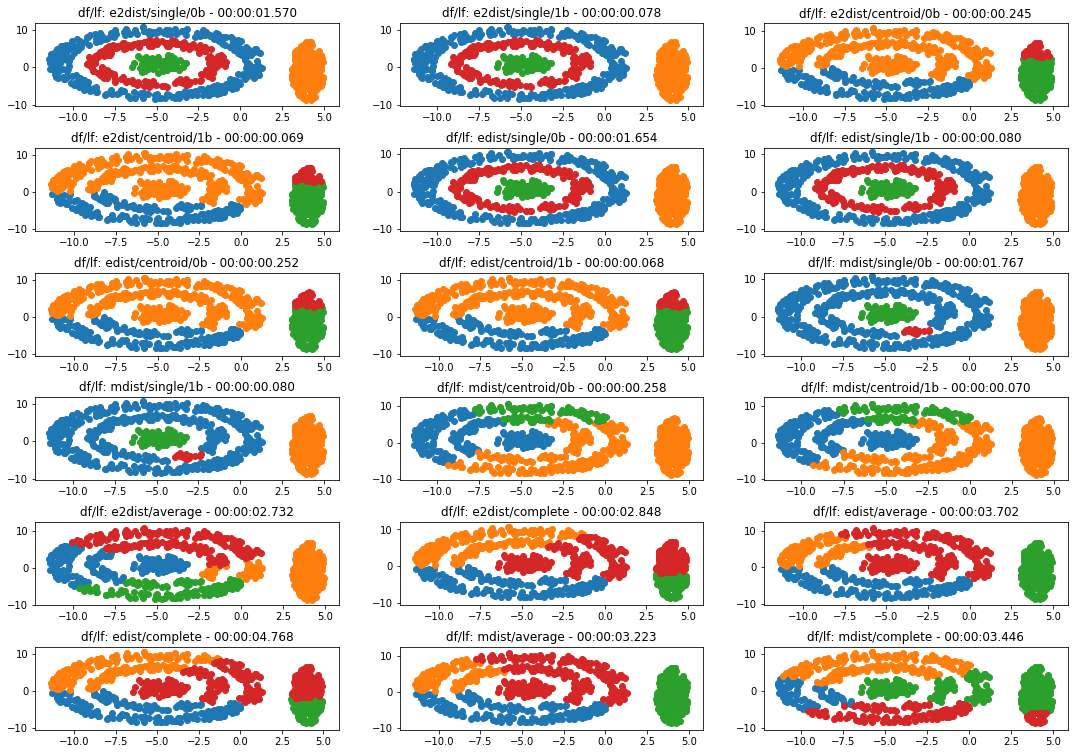

In [18]:
plotcluster[`hc;d3;((cross/)(4;-1_df;`single`centroid;01b)),(cross/)(4;-1_df;`average`complete;(::))]

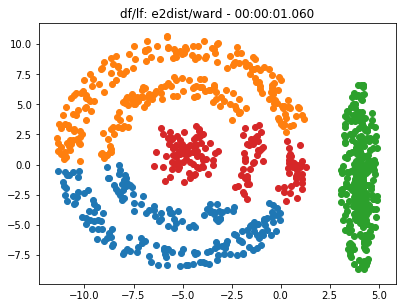

In [19]:
plotcluster[`ward;d3;(4;`e2dist;`ward;0b)]

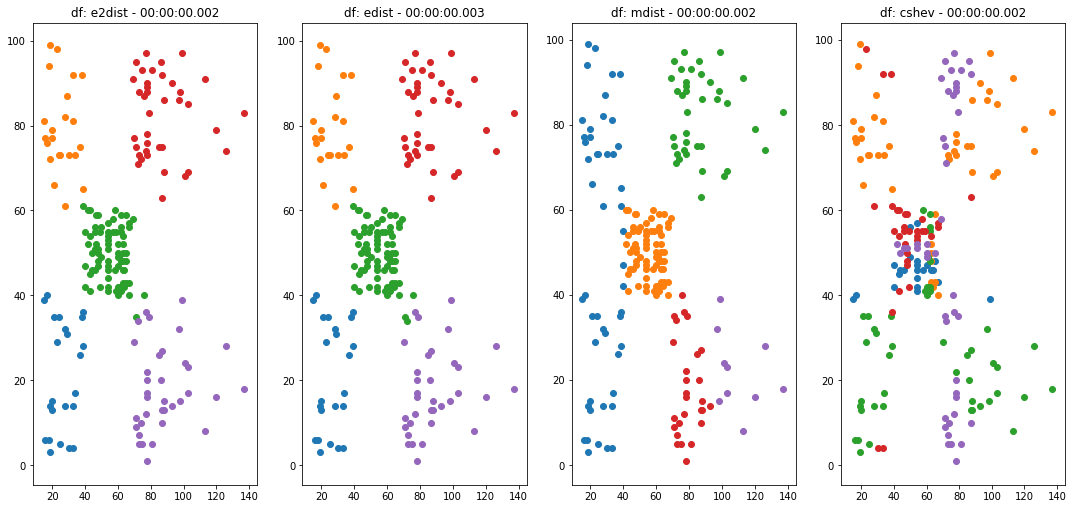

In [20]:
plotcluster[`kmeans;d2;(cross/)(5;20;1b;df)]

### Dataset 4 (3D)

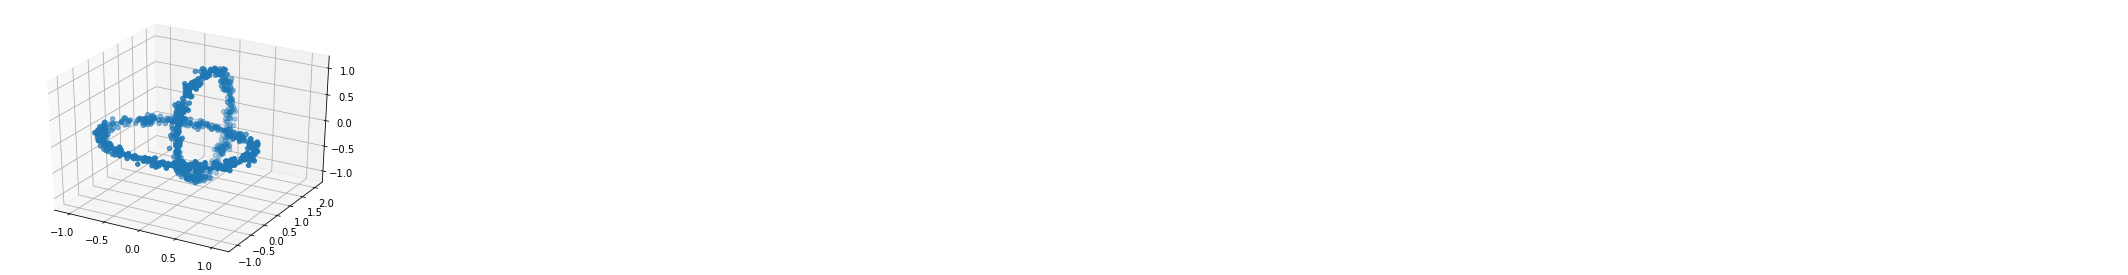

In [21]:
d4:read[fcps`:SAMPLE_CHAINLINK]`
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
ax[`:scatter][;;]. flip d4;
plt[`:show][];

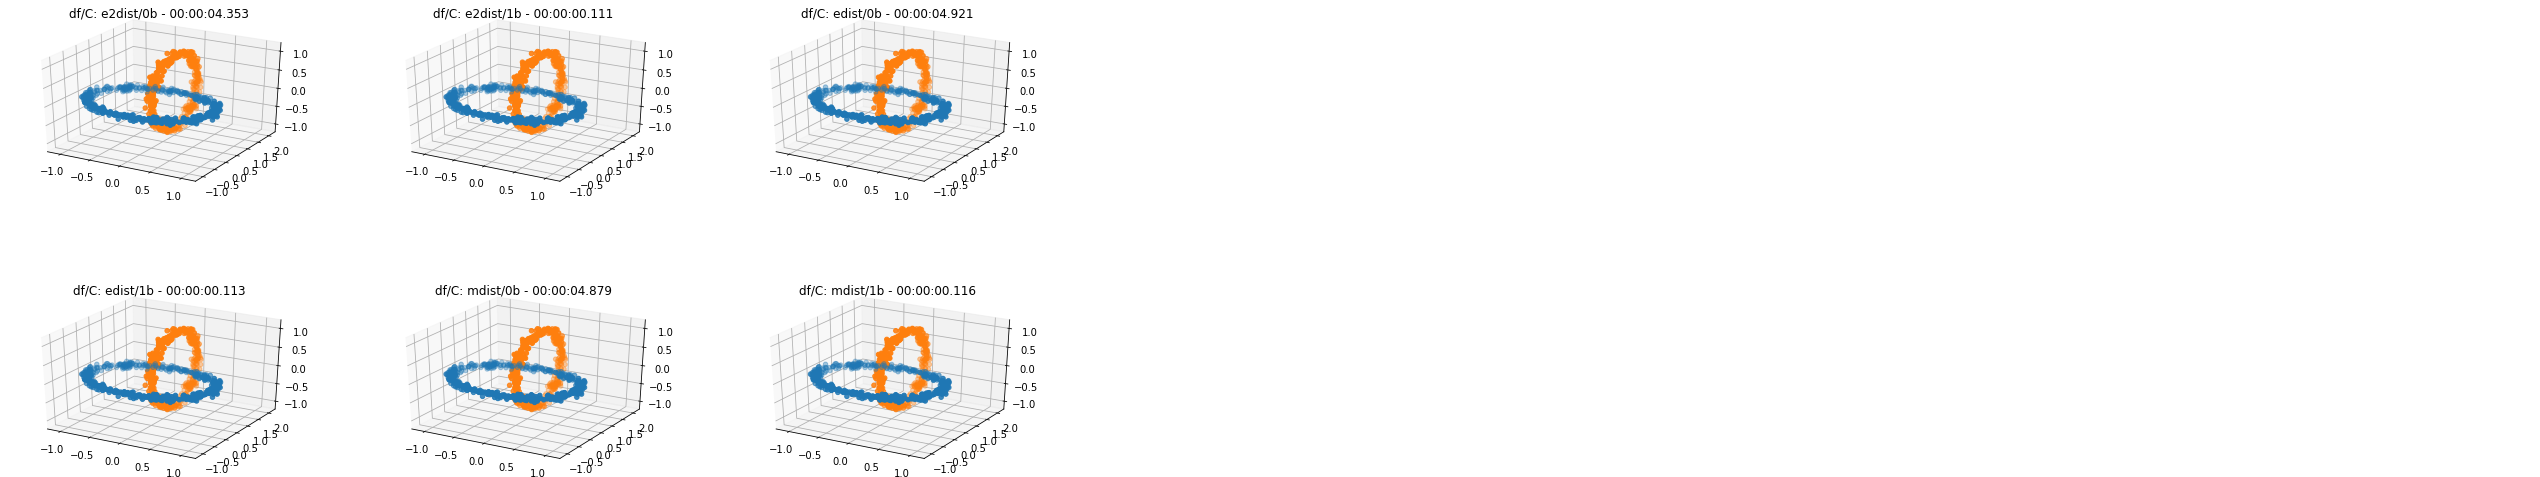

In [22]:
plotcluster[`cure;d4;(2;30),/:enlist each{![`df`b;x]}each(cross/)(-1_df;01b)]

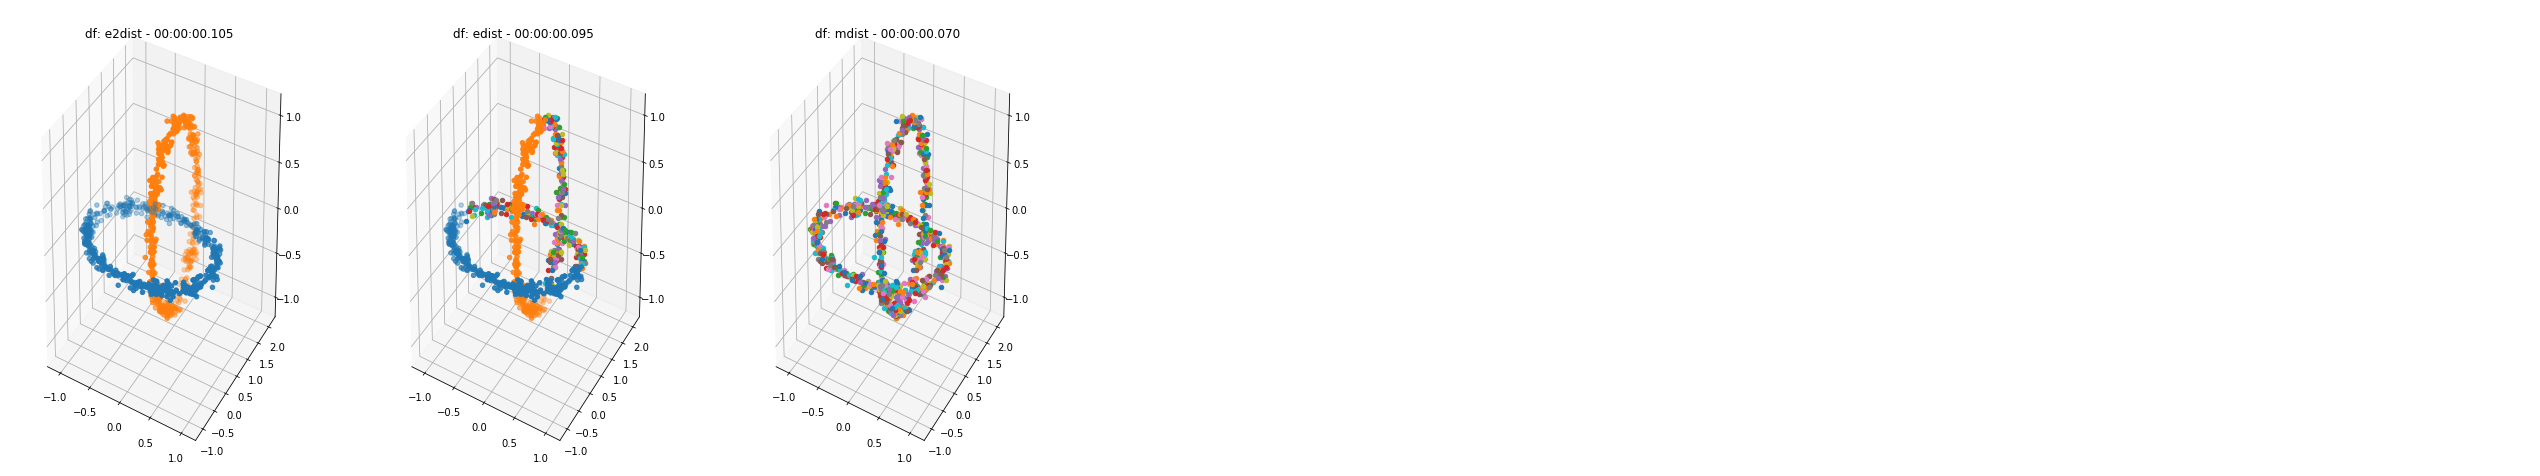

In [23]:
plotcluster[`dbscan;d4;(cross/)(-1_df;100;.6)]

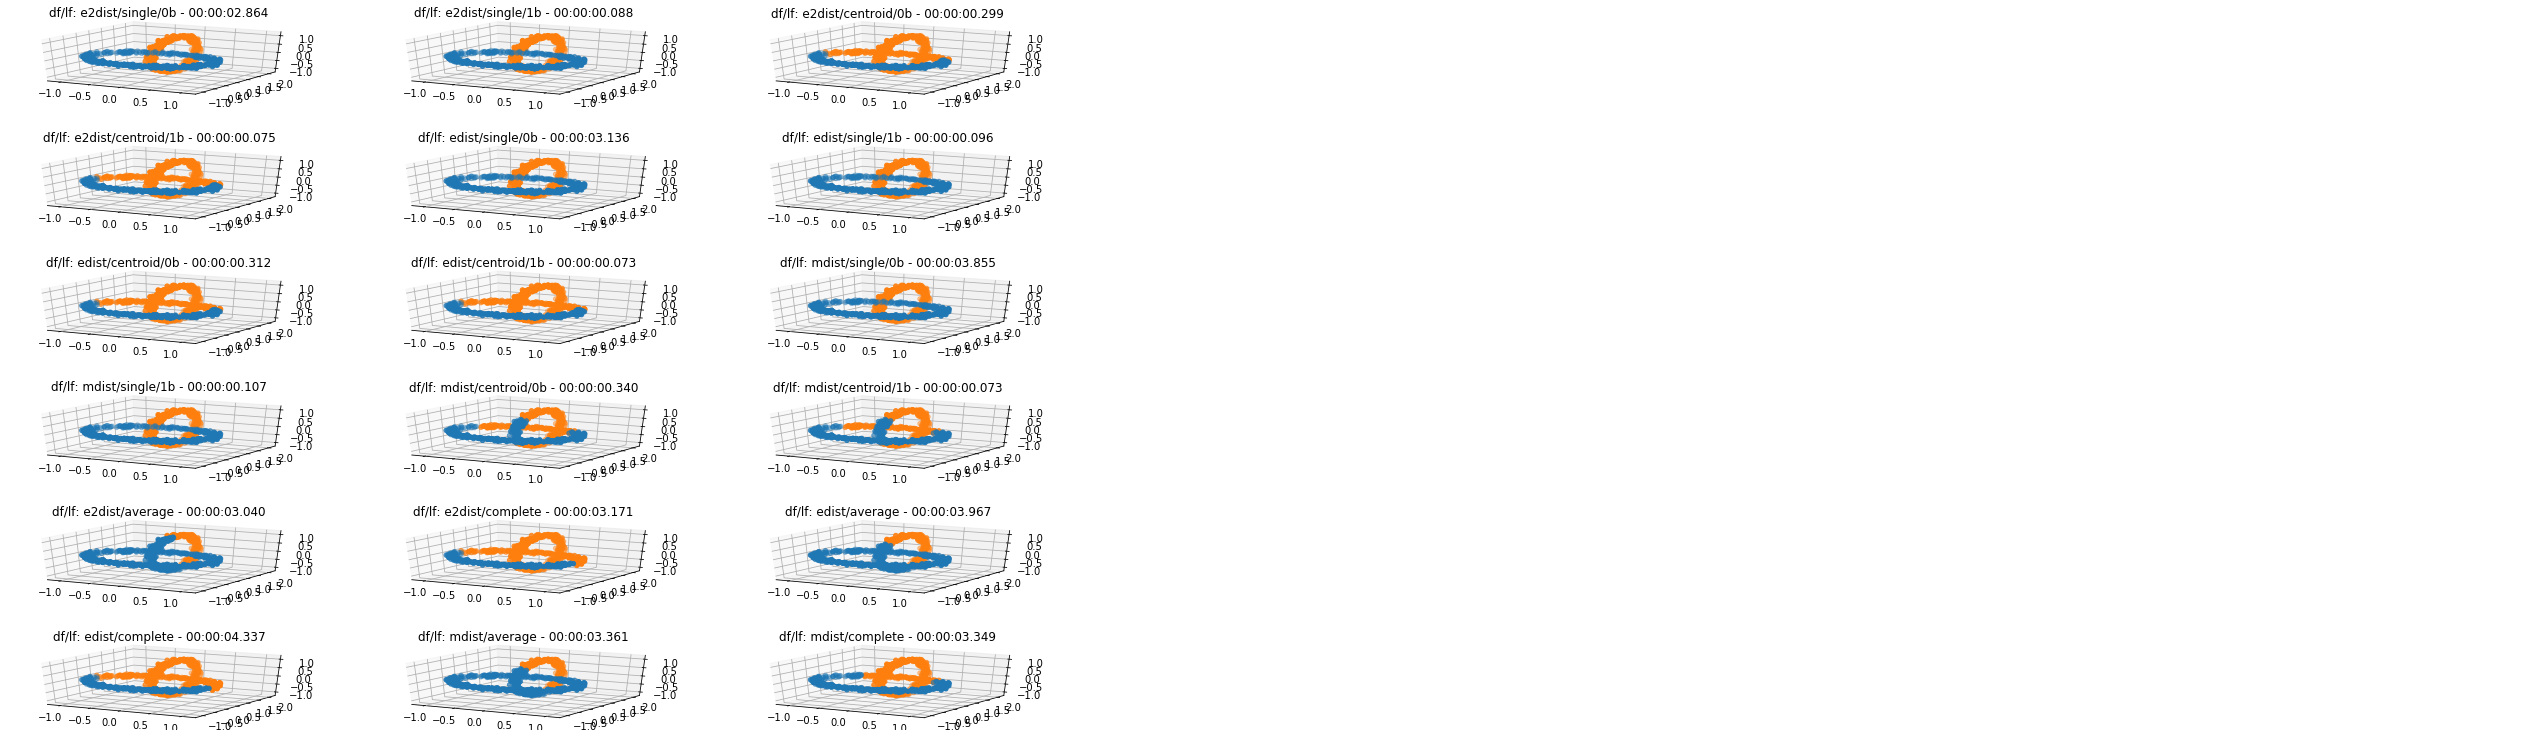

In [24]:
plotcluster[`hc;d4;((cross/)(2;-1_df;`single`centroid;01b)),(cross/)(2;-1_df;`average`complete;(::))]

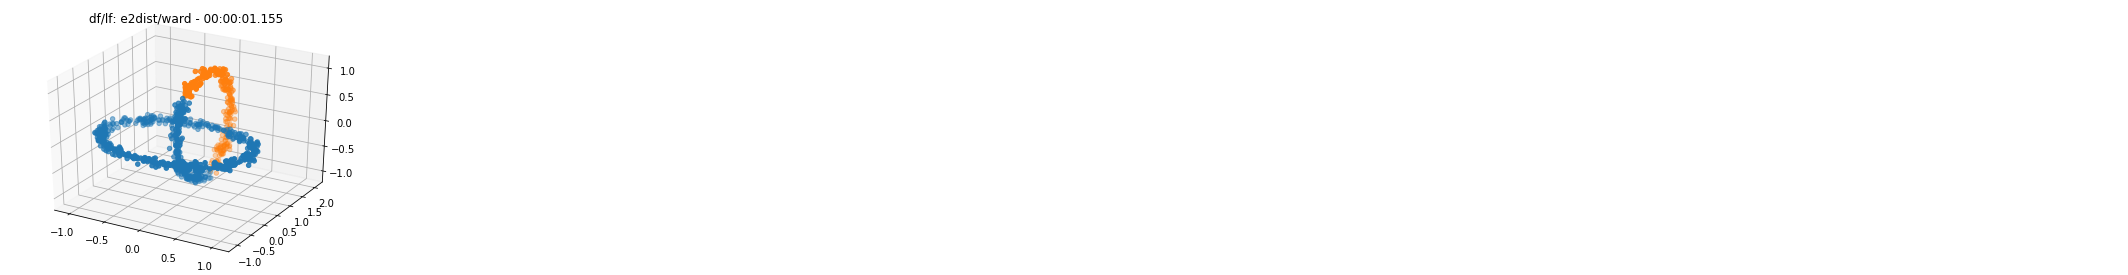

In [25]:
plotcluster[`ward;d4;(2;`e2dist;`ward;0b)]

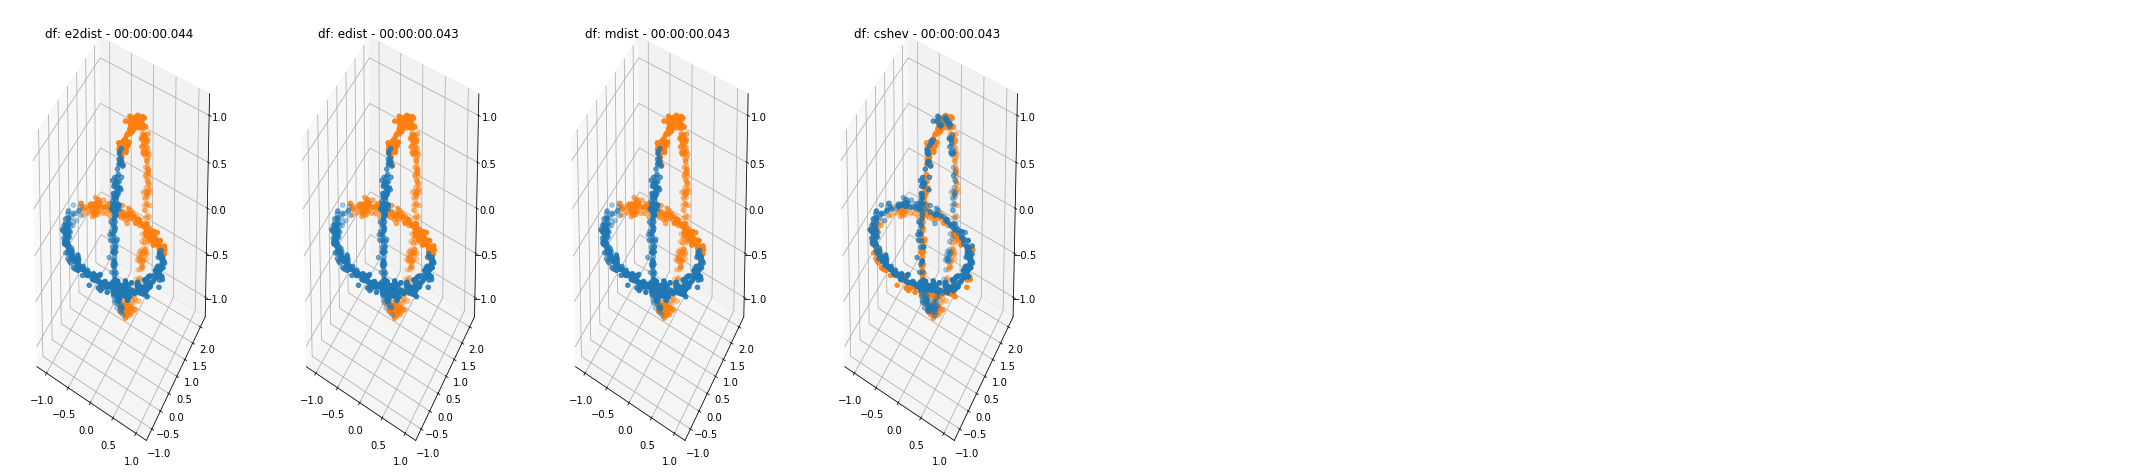

In [26]:
plotcluster[`kmeans;d4;(cross/)(2;100;1b;df)]

---